In [15]:
import os
import glob
import torch
import numpy as np
import pandas as pd
import eugene as eu

In [16]:
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene/jores21"

In [17]:
sdata_leaf = eu.dl.read(os.path.join(eu.settings.dataset_dir, "leaf_processed_test.h5sd"))
sdata_leaf

SeqData object with = 7154 seqs
seqs = (7154,)
names = (7154,)
rev_seqs = None
ohe_seqs = (7154, 4, 170)
ohe_rev_seqs = (7154, 4, 170)
seqs_annot: 'GC', 'barcodes', 'batch', 'chromosome', 'end', 'enrichment', 'gene', 'mutations', 'set', 'sp', 'start', 'strand', 'type'
pos_annot: None
seqsm: None
uns: None

In [18]:
model_file = glob.glob("eugene_logs/hybrid/version_9/checkpoints/*")[0]
model = eu.models.Hybrid.load_from_checkpoint(model_file)
model

Hybrid(
  (train_metric): R2Score()
  (val_metric): R2Score()
  (test_metric): R2Score()
  (conv1d_tower): Conv1DTower(
    (layers): Sequential(
      (0): Conv1d(4, 256, kernel_size=(13,), stride=(1,), padding=valid)
      (1): ReLU()
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.3, inplace=False)
      (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Conv1d(256, 256, kernel_size=(13,), stride=(1,), padding=valid)
      (6): ReLU()
      (7): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Dropout(p=0.3, inplace=False)
      (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): Conv1d(256, 256, kernel_size=(13,), stride=(1,), padding=valid)
      (11): ReLU()
      (12): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (13): Dropout(p=0.3, inplace=False)
      (1

In [19]:
model(torch.Tensor(sdata_leaf.ohe_seqs[:10])).squeeze(dim=1).shape

torch.Size([10])

In [24]:
eu.evaluate.predictions(
    model,
    sdata=sdata_leaf,
    target_keys="enrichment",
    name="hybrid",
    version="version_9",
    file_label="test",
    batch_size=128,
    num_workers=4
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


No transforms given, assuming just need to tensorize.


Predicting: 0it [00:00, ?it/s]

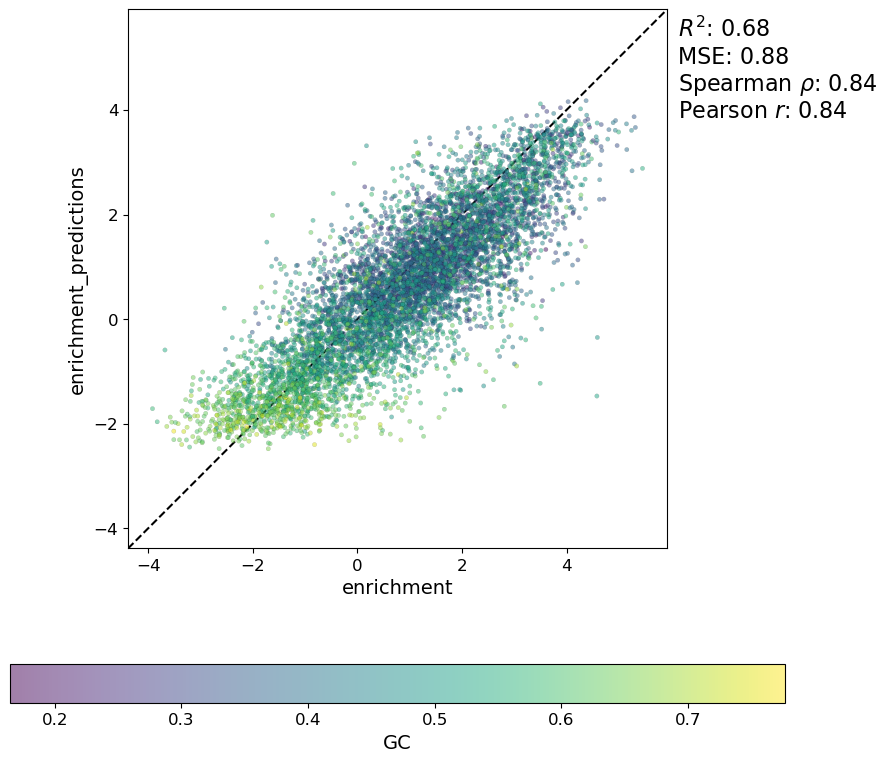

In [25]:
ax = eu.pl.performance_scatter(
    sdata_leaf, 
    target_keys="enrichment", 
    prediction_keys="enrichment_predictions",
    alpha=0.5,
    c="GC",
    figsize=(10, 10),
)